# Pneumonia Detection from X-Ray Images



The detection of pneumonia disease is commonly performed through the examination of the chest X-Ray radiograph (CXR). The examination involves the diagnosis of the manifestation of the areas of increased opacity, the further diagnosis is confirmed through clinical history, vital signs and various laboratory examinations.

The pneumonia diagnosis on CXR is hectic due to the presence of other scenarios and conditions in the lungs, such as bleeding, fluid overload, loss in volume, post-radiation or post-surgical changes. 

There is a known difference or variability amongst radiologists in the interpretation or diagnosis of the chest radiographs. 

To improve the efficiency and accuracy of diagnosis, computer-aided systems for pneumonia detection has been widely exploited in the last decade.

Deep learning approaches outperformed or outnumbered conventional machine learning methods in many medical imaging analysis tasks, including detection, classification and segmentation.

# Model Building

### Importing the required libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D,Dropout,Flatten,Dense,Activation,BatchNormalization,add
from tensorflow.keras.models  import Model,Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
from tensorflow.keras.applications.vgg16 import VGG16,preprocess_input
import os

### Concept of Transfer Learning

Transfer learning is a machine learning methodology where a developed model targeted for a specific task is "reused" as the "starting" point for a model on a second task.

In transfer learning, a base network is trained on a base dataset and task, and then it is used to "repurpose the learned features or transfer them" to a "second target network" to be trained on a target dataset and task. 

This process will tend to work if the features are general, meaning suitable to both base and target tasks, instead of specific to the base task.

Tensorflow supports transfer learning with a variety of models with pre-trained weights. 

References : 
https://www.youtube.com/watch?v=mPFq5KMxKVw
https://machinelearningmastery.com/transfer-learning-for-deep-learning/
https://www.tensorflow.org/api_docs/python/tf/keras/applications ) 


### VGG16 – Convolutional Neural Network (Classification and Detection)

VGG16 is a convolutional neural network model proposed by K. Simonyan and A. Zisserman from the University of Oxford in the paper “Very Deep Convolutional Networks for Large-Scale Image Recognition”. The model achieves 92.7% top-5 test accuracy in ImageNet, which is a dataset of over 14 million images belonging to 1000 classes. VGG16 was trained for weeks and was using NVIDIA Titan Black GPU’s.

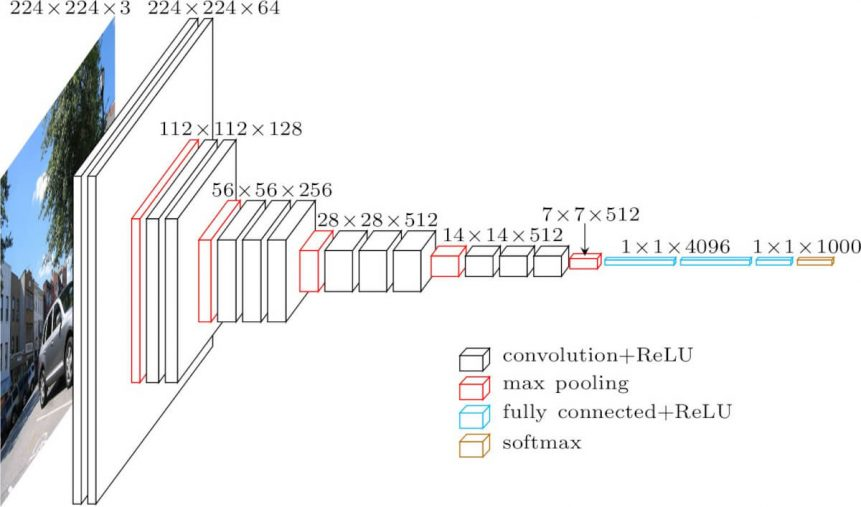

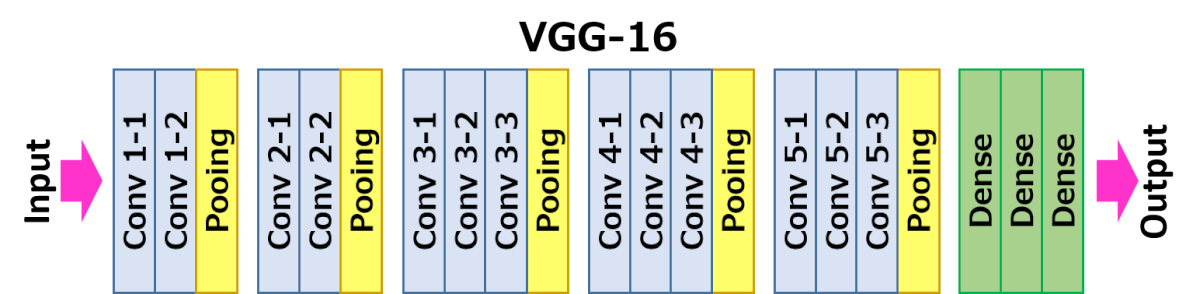

##### Source : https://neurohive.io/en/popular-networks/vgg16/

### Loading the VGG16 mode

In [ ]:
# Initializing VGG16 model
vgg = VGG16(weights= 'imagenet', include_top = False, input_shape = (224,224,3))
# include_top = False (loads full model without LAST fully connected layers) 


for layer in vgg.layers:
    layer.trainable = False #making all the layers non-trainable
    
    
# Flattening out the last layer    
x = Flatten()(vgg.output)


# Adding a dense layer
# To determine if the person is Healthy of Pneumonitic
predictions = Dense(2,activation='softmax')(x) 


model = Model(inputs=vgg.input, outputs=predictions)
model.summary()

### Data Generator Initialization for trainning the model

In [ ]:
# Getting current directory
base_dir = os.getcwd() 

# Defining the input shape
target_shape = (224,224) 

train_dir = base_dir+"\\chest_xray\\train" # 
val_dir = base_dir+"\\chest_xray\\val"     # -- Directories for data
test_dir = base_dir+"\\chest_xray\\test"   # 

#### Loading the VGG16 model with Imagenet weights without the Fully Connected layers

In [ ]:
vgg = VGG16(weights= 'imagenet', include_top = False, input_shape = (224,224,3))
for layer in vgg.layers:
    layer.trainable = False # Making all the layers non-trainable
    

ImageNet is formally a project aimed at (manually) labeling and categorizing images into almost 22,000 separate object categories.

Source : https://www.pyimagesearch.com/2017/03/20/imagenet-vggnet-resnet-inception-xception-keras/

Neural network cheatsheet : https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-convolutional-neural-networks

In [ ]:
# Flattening out the last layer

x = Flatten()(vgg.output) 
predictions = Dense(2,activation='softmax')(x) #Dense layer to predict wether their is pneumonia or not
model = Model(inputs=vgg.input, outputs=predictions)
model.summary()


In [ ]:
# Making the data loader for training data
train_gen = ImageDataGenerator(rescale=1/255.0,
                               horizontal_flip=True,
                               zoom_range=0.2,
                               shear_range=0.2) 


# Making the data loader for validation data
test_gen = ImageDataGenerator(rescale=1/255.0) 


# Function to make iterable object for training
train_data_gen = train_gen.flow_from_directory(train_dir,
                                               target_shape,
                                               batch_size=16,
                                               class_mode='categorical') 

# Function to make iterable object for training
test_data_gen = train_gen.flow_from_directory(test_dir,
                                               target_shape,
                                               batch_size=16,
                                               class_mode='categorical') 

In [ ]:
# viualize some images from the training data
# visualize the Normal Class
import random
W = 5
H = 5
fig, axes = plt.subplots(W, H, figsize = (17,17))

axes = axes.ravel() # flaten the matrix into array
for i in np.arange(0, W * H): 
    label ='NORMAL'
    class_dir = os.path.join(train_dir,label)
    # Select a random image
    image = random.choice(os.listdir(class_dir))
    # read and display an image with the selected index    
    img = plt.imread(os.path.join(class_dir,image))
    axes[i].imshow( img )
    axes[i].set_title(label, fontsize = 8) # the label
    axes[i].axis('off')


In [ ]:
# viualize some images from the training data
# visualize the PNEUMONIA Class
W = 5
H = 5
fig, axes = plt.subplots(W, H, figsize = (17,17))

axes = axes.ravel() # flaten the matrix into array
for i in np.arange(0, W * H): 
    label ='PNEUMONIA'
    class_dir = os.path.join(train_dir,label)
    # Select a random image
    image = random.choice(os.listdir(class_dir))
    # read and display an image with the selected index    
    img = plt.imread(os.path.join(class_dir,image))
    axes[i].imshow( img )
    axes[i].set_title(label, fontsize = 8) # the label
    axes[i].axis('off')
len(train_dir) 

# viualize some images after the augmentation

In [ ]:
# viualize some images after the augmentation
x_batch, y_batch = next(train_data_gen)
W = 4
H = 4
fig, axes = plt.subplots(W, H, figsize = (16,16))

axes = axes.ravel() # flaten the matrix into array
for i in np.arange(0, W * H): 

    # Select a random image
    image = x_batch[i]
    # read and display an image with the selected index    
    axes[i].imshow( image )
    axes[i].set_title(y_batch[i], fontsize = 8) # the label
    axes[i].axis('off')
len(train_data_gen)    

### Compiling and Training the Model

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
hist = model.fit_generator(train_data_gen,
        steps_per_epoch=20,
        epochs=20,
        validation_data=test_data_gen,
        validation_steps=10)

### Plotting the Accuracy and Loss curves

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(hist.history["loss"], label="train_loss")
plt.plot(hist.history["val_loss"], label="val_loss")
plt.plot(hist.history["accuracy"], label="train_acc")
plt.plot(hist.history["val_accuracy"], label="val_acc")
plt.title("Model Training")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig("epochs.png")

In [ ]:
image_size = 256
vgg_model = VGG16(input_shape= (image_size, image_size,3), 
                  weights='imagenet',
                  include_top=False)

In [ ]:
vgg_model.trainable = False

In [ ]:
transfer_model = Sequential()
transfer_model.add(vgg_model)
transfer_model.add(Flatten())
transfer_model.add(Dense(512,activation='relu'))
transfer_model.add(Dense(128,activation='relu'))
transfer_model.add(Dense(1,activation='sigmoid'))

In [ ]:
transfer_model.summary()

In [ ]:
transfer_model.compile(loss = 'binary_crossentropy', 
                          optimizer = 'adam',
                          metrics = ['accuracy'] )

In [ ]:
vgg_model.trainable = True
set_trainable = False
for layer in vgg_model.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
transfer_model.compile(loss = 'binary_crossentropy', 
                          optimizer = 'Adam', 
                          metrics = ['accuracy'] )

In [ ]:
transfer_model.summary()


### Saving the Model

In [ ]:
import tensorflow as tf
from keras.models import load_model

model.save('chest_xray.h5')

In [ ]:
from keras.models import load_model


In [ ]:
from keras.preprocessing import image


In [ ]:
from keras.applications.vgg16 import preprocess_input


In [ ]:
import numpy as np


In [ ]:
model=load_model('chest_xray.h5')


In [ ]:
img=image.load_img('C:\\Users\\nazih\\Downloads\\archive\\chest_xray\\val\\NORMAL\\NORMAL2-IM-1427-0001.jpeg',target_size=(224,224))

In [ ]:
x=image.img_to_array(img)


In [ ]:
x=np.expand_dims(x, axis=0)


In [ ]:
img_data=preprocess_input(x)


In [ ]:
classes=model.predict(img_data)


In [ ]:
result=int(classes[0][0])


In [ ]:
if result==0:
    print("Person is Affected By PNEUMONIA")
else:
    print("Result is Normal")

In [ ]:
import streamlit as st
